This file will process the raw data according to standard processing for RNA seq data. The different normalization methods considered were stored in https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6171491/.

In [147]:
import pandas as pd 
import numpy as np
import pygmnormalize as gmn
import seaborn as sns
import time

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [148]:
df = pd.read_csv('raw_data.tsv', sep='\t', header=0)

In [149]:
df.head()

,Gene ID,Gene Name,SRR1782685,SRR1782686,SRR1782687,SRR1782688,SRR1782689,SRR1782690,SRR1782691,SRR1782692,...,SRR1782997,SRR1782998,SRR1782999,SRR1783000,SRR1783001,SRR1783002,SRR1783003,SRR1783004,SRR1783005,SRR1783006
0,ENSG00000000003,TSPAN6,469,107,807,458,173,159,187,223,...,767,371,288,628,580,411,711,697,792,454
1,ENSG00000000005,TNMD,7,0,11,0,0,2,4,0,...,9,3,0,3,6,0,3,0,6,0
2,ENSG00000000419,DPM1,238,199,288,220,260,97,108,122,...,381,333,200,376,235,159,643,342,341,297
3,ENSG00000000457,SCYL3,145,107,151,166,153,38,88,68,...,264,220,142,214,154,61,353,208,154,126
4,ENSG00000000460,C1orf112,35,43,22,39,37,18,25,21,...,84,58,38,56,59,23,114,56,33,24


In [150]:
len(list(df))

324

In [151]:
gene_ID = df['Gene ID']
gene_names = df['Gene Name']

In [152]:
df.drop('Gene ID', axis=1, inplace=True)
df.drop('Gene Name', axis=1, inplace=True)

In [153]:
df.head()

,SRR1782685,SRR1782686,SRR1782687,SRR1782688,SRR1782689,SRR1782690,SRR1782691,SRR1782692,SRR1782693,SRR1782694,...,SRR1782997,SRR1782998,SRR1782999,SRR1783000,SRR1783001,SRR1783002,SRR1783003,SRR1783004,SRR1783005,SRR1783006
0,469,107,807,458,173,159,187,223,251,182,...,767,371,288,628,580,411,711,697,792,454
1,7,0,11,0,0,2,4,0,1,0,...,9,3,0,3,6,0,3,0,6,0
2,238,199,288,220,260,97,108,122,116,100,...,381,333,200,376,235,159,643,342,341,297
3,145,107,151,166,153,38,88,68,70,85,...,264,220,142,214,154,61,353,208,154,126
4,35,43,22,39,37,18,25,21,12,17,...,84,58,38,56,59,23,114,56,33,24


In [154]:
normal_df = gmn.total_count_normalization(df)

In [214]:
normal_df

,SRR1782685,SRR1782686,SRR1782687,SRR1782688,SRR1782689,SRR1782690,SRR1782691,SRR1782692,SRR1782693,SRR1782694,...,SRR1782997,SRR1782998,SRR1782999,SRR1783000,SRR1783001,SRR1783002,SRR1783003,SRR1783004,SRR1783005,SRR1783006
0,5.064846e-05,1.390220e-05,0.000086,4.830331e-05,2.264291e-05,5.634691e-05,5.001545e-05,5.633922e-05,7.515083e-05,3.843979e-05,...,6.160122e-05,3.568170e-05,4.330241e-05,5.397875e-05,7.586702e-05,0.000078,3.859068e-05,5.708651e-05,8.075028e-05,5.118729e-05
1,7.559472e-07,0.000000e+00,0.000001,0.000000e+00,0.000000e+00,7.087662e-07,1.069849e-06,0.000000e+00,2.994057e-07,0.000000e+00,...,7.228305e-07,2.885313e-07,0.000000e+00,2.578603e-07,7.848312e-07,0.000000,1.628299e-07,0.000000e+00,6.117446e-07,0.000000e+00
2,2.570220e-05,2.585549e-05,0.000031,2.320247e-05,3.402981e-05,3.437516e-05,2.888593e-05,3.082236e-05,3.473106e-05,2.112076e-05,...,3.059982e-05,3.202697e-05,3.007112e-05,3.231849e-05,3.073922e-05,0.000030,3.489987e-05,2.801088e-05,3.476748e-05,3.348596e-05
3,1.565891e-05,1.390220e-05,0.000016,1.750731e-05,2.002523e-05,1.346656e-05,2.353668e-05,1.717967e-05,2.095840e-05,1.795265e-05,...,2.120303e-05,2.115896e-05,2.135049e-05,1.839403e-05,2.014400e-05,0.000012,1.915965e-05,1.703586e-05,1.570144e-05,1.420616e-05
4,3.779736e-06,5.586865e-06,0.000002,4.113164e-06,4.842703e-06,6.378896e-06,6.686557e-06,5.305487e-06,3.592868e-06,3.590530e-06,...,6.746418e-06,5.578271e-06,5.713512e-06,4.813392e-06,7.717507e-06,0.000004,6.187535e-06,4.586577e-06,3.364595e-06,2.705936e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65212,0.000000e+00,1.299271e-07,0.000000,6.327945e-07,1.308839e-07,0.000000e+00,5.349246e-07,0.000000e+00,2.994057e-07,2.112076e-07,...,1.606290e-07,0.000000e+00,1.503556e-07,0.000000e+00,2.616104e-07,0.000000,1.628299e-07,0.000000e+00,2.039149e-07,1.127473e-07
65213,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
65214,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
65215,0.000000e+00,0.000000e+00,0.000000,1.054658e-07,0.000000e+00,0.000000e+00,2.674623e-07,2.526423e-07,2.994057e-07,2.112076e-07,...,8.031450e-08,9.617709e-08,0.000000e+00,1.719069e-07,1.308052e-07,0.000000,5.427662e-08,8.190317e-08,0.000000e+00,0.000000e+00


### Trying to get genes of interest

In [156]:
patients = list(df)
len(patients)

322

In [157]:
X = normal_df.values

In [158]:
X.shape

(65217, 322)

In [159]:
## indices with all values as 0
idx = np.where(~X.any(axis=1))[0]

In [160]:
X[idx].shape

(10303, 322)

In [161]:
## indices where values are greater than zero
idx2 = np.where(X.any(axis=1))[0]
newX = X[idx2]
newX.shape

(54914, 322)

In [238]:
names = gene_names[idx2].values[rows]

In [162]:
## get rows where a value is greater than 0.0001
rows = np.unique(np.where(newX > 0.0001)[0])
newerX = newX[rows]
newerX.shape

(5637, 322)

In [163]:
by_patient = newerX.T
by_patient.shape

(322, 5637)

In [164]:
new_df = pd.DataFrame(by_patient, index=patients)

In [165]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,5627,5628,5629,5630,5631,5632,5633,5634,5635,5636
SRR1782685,0.000051,0.000016,0.000098,0.000114,7.516275e-05,0.000012,0.000154,0.000113,0.000367,0.000609,...,0.000024,0.000017,0.000004,0.000012,0.000002,0.000003,0.000007,0.000020,0.000002,0.000057
SRR1782686,0.000014,0.000112,0.000225,0.000022,1.299271e-07,0.000014,0.000272,0.000206,0.000013,0.000280,...,0.000031,0.000032,0.000006,0.000015,0.000004,0.000003,0.000032,0.000025,0.000002,0.000050
SRR1782687,0.000086,0.000039,0.000175,0.000056,3.796659e-05,0.000013,0.000595,0.000083,0.000374,0.000437,...,0.000024,0.000013,0.000003,0.000010,0.000004,0.000003,0.000014,0.000015,0.000002,0.000042
SRR1782688,0.000048,0.000005,0.000089,0.000069,7.551348e-05,0.000014,0.000080,0.000143,0.000881,0.000704,...,0.000026,0.000007,0.000007,0.000017,0.000003,0.000004,0.000004,0.000026,0.000004,0.000069
SRR1782689,0.000023,0.000071,0.000189,0.000037,7.983916e-06,0.000018,0.000311,0.000153,0.000023,0.000284,...,0.000038,0.000044,0.000005,0.000017,0.000005,0.000004,0.000047,0.000023,0.000004,0.000088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR1783002,0.000078,0.000025,0.000085,0.000060,3.761515e-05,0.000017,0.000118,0.000129,0.000838,0.000575,...,0.000026,0.000009,0.000003,0.000008,0.000004,0.000003,0.000012,0.000015,0.000001,0.000063
SRR1783003,0.000039,0.000024,0.000114,0.000050,3.430283e-05,0.000019,0.000308,0.000166,0.000718,0.000491,...,0.000027,0.000007,0.000004,0.000011,0.000004,0.000003,0.000011,0.000021,0.000002,0.000103
SRR1783004,0.000057,0.000012,0.000110,0.000055,5.544844e-05,0.000014,0.000091,0.000097,0.000864,0.000637,...,0.000032,0.000011,0.000004,0.000016,0.000004,0.000005,0.000006,0.000025,0.000005,0.000098
SRR1783005,0.000081,0.000030,0.000116,0.000062,5.393548e-05,0.000020,0.000138,0.000120,0.000385,0.000519,...,0.000017,0.000008,0.000002,0.000008,0.000003,0.000002,0.000010,0.000013,0.000001,0.000061


In [166]:
classes = open('classifications.txt', 'r').read()
classes = eval(classes)
classes.values()

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

### PCA

In [167]:
## PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(by_patient)

In [168]:
pca_df = pd.DataFrame()
pca_df['pca-one'] = pca_result[:,0]
pca_df['pca-two'] = pca_result[:,1] 
pca_df['pca-three'] = pca_result[:,2]
pca_df['y'] = classes.values()
pca_df

,pca-one,pca-two,pca-three,y
0,-0.004089,0.002326,-0.006322,0
1,-0.022355,0.070703,0.029807,0
2,-0.004911,0.011939,-0.005354,0
3,0.009768,-0.011681,0.000350,0
4,-0.012958,0.024138,-0.003612,0
...,...,...,...,...
317,-0.003054,-0.006460,0.006807,1
318,-0.005988,-0.003066,-0.000251,1
319,-0.001927,-0.010251,0.002945,0
320,0.012211,-0.004006,0.002014,0


In [169]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.52146625 0.12276463 0.09137668]


In [170]:
vals = np.arange(start=0, stop=322)

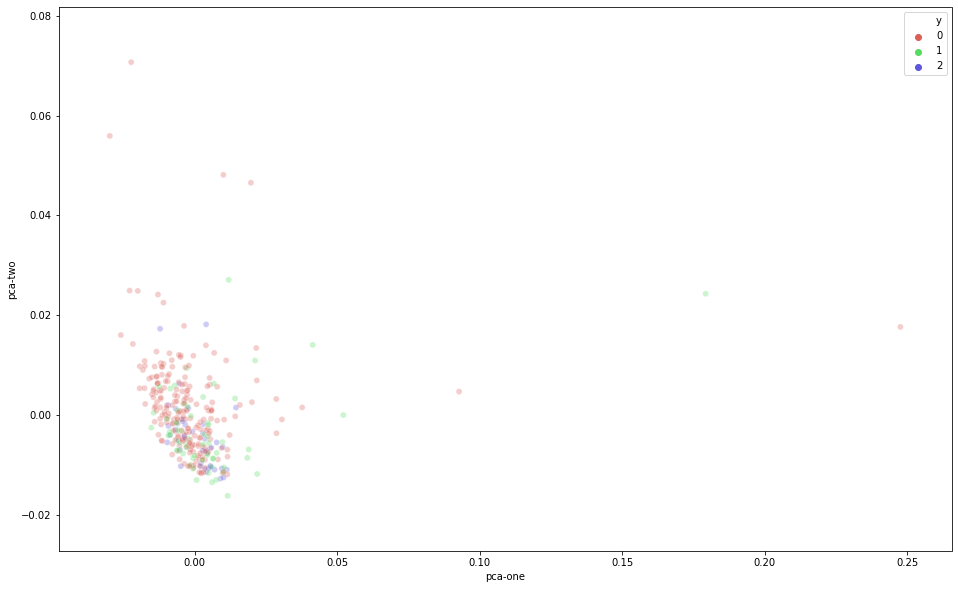

In [171]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=pca_df.loc[vals,:],
    legend="full",
    alpha=0.3
)

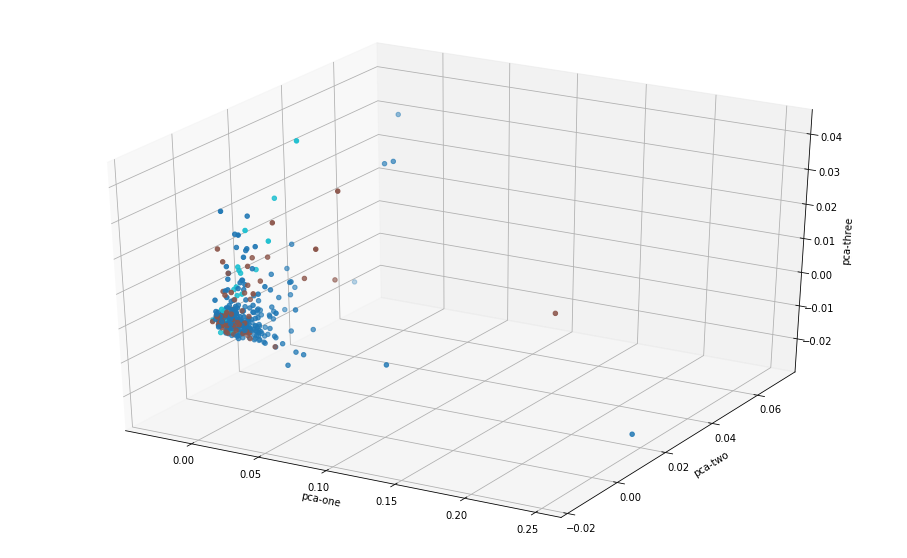

In [172]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_df["pca-one"], 
    ys=pca_df["pca-two"], 
    zs=pca_df["pca-three"], 
    c=pca_df["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### T-SNE

In [203]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(by_patient)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 322 samples in 0.049s...
[t-SNE] Computed neighbors for 322 samples in 1.028s...
[t-SNE] Computed conditional probabilities for sample 322 / 322
[t-SNE] Mean sigma: 0.006382
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.794373
[t-SNE] KL divergence after 1000 iterations: 0.746238
t-SNE done! Time elapsed: 1.898024082183838 seconds


In [204]:
tsne_df = pd.DataFrame()
tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]
tsne_df['y'] = classes.values()

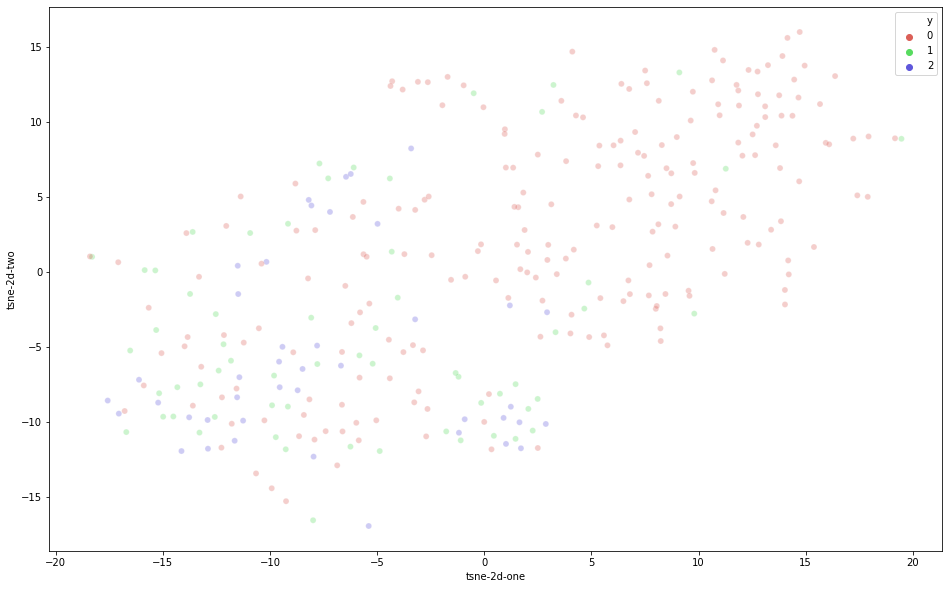

In [205]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=tsne_df,
    legend="full",
    alpha=0.3
)

## T-SNE by Gene

In [280]:
## get rows where a value is greater than 0.01
rows2 = np.unique(np.where(newX > 0.01)[0])
newerX2 = newX[rows2]
newerX2.shape

(46, 322)

In [281]:
names = gene_names[idx2].values[rows2]
names.shape

(46,)

In [282]:
gene_df = pd.DataFrame(newerX2)

In [283]:
gene_df.shape

(46, 322)

In [284]:
names.shape

(46,)

In [285]:
# gene_df['y'] = names

In [286]:
gene_df

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
0,0.003993,0.004899,0.005207,0.002307,0.005163,0.004780,0.005046,0.003454,0.005579,0.003918,...,0.002889,0.003966,0.004076,0.002785,0.005269,0.003192,0.005007,0.002702,0.003571,0.003091
1,0.001475,0.000019,0.000611,0.012853,0.000030,0.000318,0.000047,0.004870,0.000492,0.011281,...,0.002110,0.001918,0.002770,0.003910,0.000987,0.001765,0.002058,0.005366,0.001563,0.002387
2,0.001253,0.000015,0.000369,0.002532,0.000014,0.000323,0.000016,0.001289,0.000828,0.011158,...,0.001201,0.001097,0.000827,0.001723,0.001524,0.003081,0.002336,0.004785,0.002201,0.001055
3,0.000361,0.005200,0.001305,0.000272,0.004539,0.000642,0.001366,0.000257,0.000534,0.000295,...,0.000393,0.000222,0.000682,0.000335,0.001020,0.000255,0.000266,0.000223,0.000412,0.000177
4,0.008744,0.000071,0.013645,0.000493,0.001441,0.002311,0.003780,0.001781,0.011472,0.001083,...,0.007907,0.000640,0.001132,0.007050,0.009411,0.015865,0.001709,0.002733,0.013214,0.001970
5,0.000183,0.000002,0.000238,0.002742,0.000018,0.000033,0.000003,0.001013,0.000087,0.003168,...,0.000847,0.000838,0.000390,0.000875,0.000278,0.001524,0.001907,0.002230,0.000521,0.001532
6,0.000019,0.001749,0.000285,0.000003,0.000515,0.000035,0.000029,0.000001,0.000039,0.000001,...,0.000012,0.000007,0.000036,0.000013,0.000105,0.000007,0.000007,0.000009,0.000013,0.000001
7,0.005492,0.006261,0.011283,0.001960,0.004385,0.005144,0.002527,0.002838,0.004392,0.001783,...,0.003423,0.000993,0.002859,0.002240,0.001675,0.001683,0.001540,0.001189,0.002648,0.002243
8,0.004350,0.000065,0.003618,0.011423,0.000161,0.002341,0.000657,0.011176,0.003362,0.010720,...,0.005542,0.004526,0.004984,0.008044,0.003259,0.009843,0.005112,0.011152,0.008354,0.016019
9,0.000877,0.000006,0.000794,0.000459,0.000083,0.000674,0.000154,0.000657,0.000459,0.000392,...,0.000447,0.000241,0.000348,0.000591,0.000422,0.000862,0.000399,0.000657,0.000585,0.000910


In [287]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(gene_df)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 45 nearest neighbors...
[t-SNE] Indexed 46 samples in 0.000s...
[t-SNE] Computed neighbors for 46 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 46 / 46
[t-SNE] Mean sigma: 0.064605
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.853634
[t-SNE] KL divergence after 300 iterations: 0.817991
t-SNE done! Time elapsed: 0.10183501243591309 seconds


In [288]:
gene_tsne_df = pd.DataFrame()
gene_tsne_df['tsne-2d-one'] = tsne_results[:,0]
gene_tsne_df['tsne-2d-two'] = tsne_results[:,1]
gene_tsne_df['y'] = names
gene_tsne_df

,tsne-2d-one,tsne-2d-two,y
0,-48.510136,-30.331617,ACTB
1,78.436821,50.080097,APOB
2,32.498356,53.027237,APOA4
3,7.904379,-2.676084,SOD2
4,58.883736,-27.399040,REG1A
5,-39.233391,-9.405686,APOA1
6,-23.841286,30.560991,IL1B
7,-33.618084,52.277527,JCHAIN
8,-14.241850,-37.466095,ALDOB
9,0.034473,11.393004,TFF3


In [289]:
names, len(names)

(array(['ACTB', 'APOB', 'APOA4', 'SOD2', 'REG1A', 'APOA1', 'IL1B',
        'JCHAIN', 'ALDOB', 'TFF3', 'PIGR', 'DEFA5', 'DEFA6', 'B2M',
        'ANPEP', 'COL3A1', 'REG3A', 'REG1B', 'MMP1', 'MT-ND6', 'MT-CO2',
        'MT-CYB', 'MT-ND2', 'MT-ND5', 'MT-CO1', 'MT-ND3', 'MT-ND4',
        'MT-ND1', 'MT-ATP6', 'MT-CO3', 'MT-RNR2', 'MT-TA', 'MT-TN',
        'MT-RNR1', 'IGKC', 'IGLC2', 'IGHA2', 'IGHG2', 'IGHA1', 'IGHG1',
        'IGHG3', 'IGHM', 'MT-ND4L', 'AC010970.1', nan, 'MT-ATP8'],
       dtype=object),
 46)

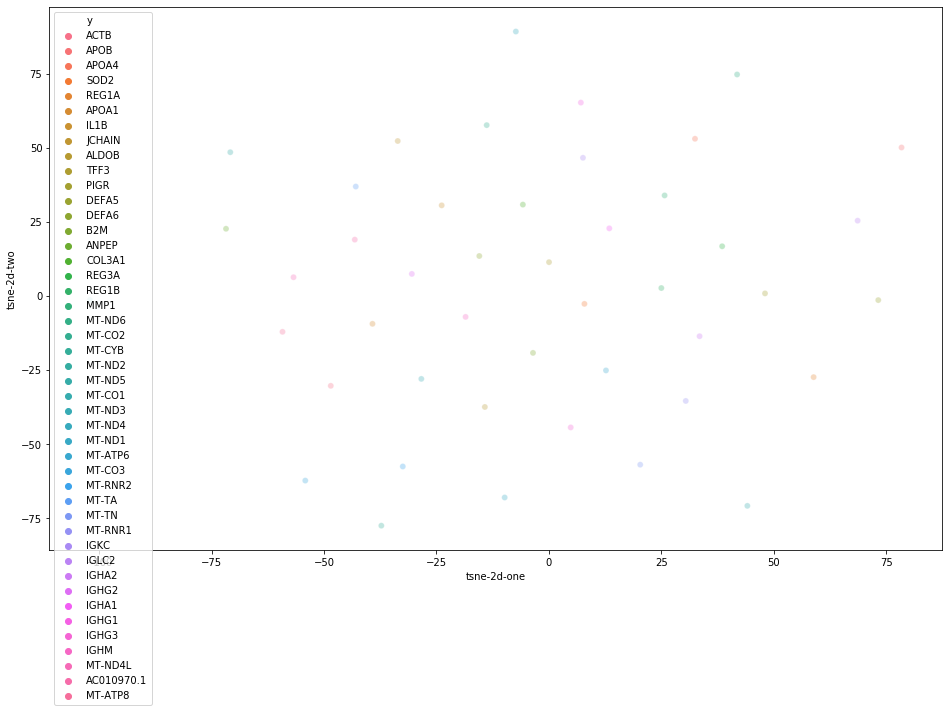

In [291]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
#     palette=sns.color_palette("hls", 437),
    data=gene_tsne_df,
    legend="full",
    alpha=0.3
)

In [277]:
len(set(names))

437